### Full run with conduino, probes B and C

Probes B and C near canyons heads and no dye. Profiler probe P.


In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
def time2dist(max_depth, time):
    '''Convert time of measurement to distance - Not correct yet because 
    profiles goes faster at the top and slower at the bottom 
    so dt to dx conversion factor is not constant '''
    depth = np.zeros(np.shape(time))
    time_norm = time-time[0]
    depth = (time_norm * max_depth) / np.max(time_norm)
    return(depth)

def densP(reading):
    ''' Calibration from 20 feb 2019 in probesBCP_20feb19.ipynb. Returns density fitted using a 3rd deg polynomial.
    Input - reading::array
    Output - fitP::array of size [reading]'''
    fitP = 0.998397+(0.004542*reading)+(0.000282*reading**2) + (0.000347*reading**3)
    return(fitP)

Probes B upstream and C downstream. Both near head

|Channel|Probe|
|::|::|
|'ch3':|B|
|'ch1':|C|
|'ch4':|P|



In [3]:
def dens_K(read):
    rho_K = 0.997645 + 0.004937*read + 0.006870*(read**2) - 0.000332*(read**3)
    return(rho_K)

def dens_A(read):
    rho_A = 0.997590 + 0.006686*read + 0.001903*(read**2) + 0.000142*(read**3)
    return(rho_A)

def plot_uprofile(ax):
    ax.axvline(16.8, color='0.8', linestyle=':')
    ax.axvline(50.0, color='0.8', linestyle=':')
        

### Initial readings 

../../exp_26feb19/right_after_filling_26feb19.mat
../../exp_26feb19/30min_after_filling_26feb19.mat
../../exp_26feb19/60min_after_filling_26feb19.mat
../../exp_26feb19/105min_after_filling_26feb19.mat


Text(0.5,0,'time / s')

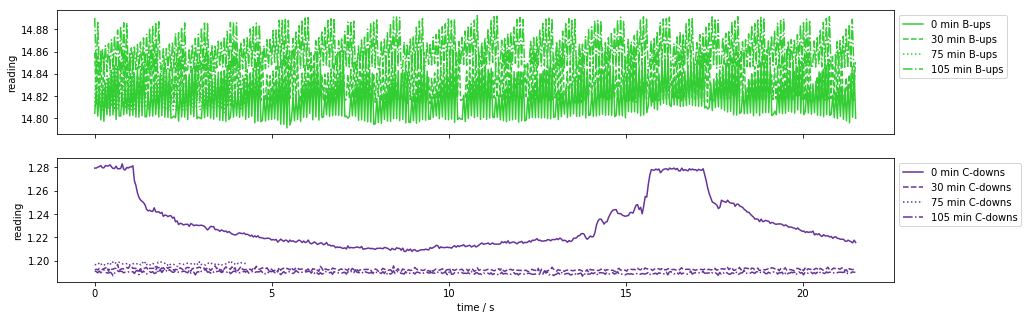

In [47]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,5), sharex=True)

labelsB = ['0 min B-ups','30 min B-ups','75 min B-ups','105 min B-ups','exp B-ups']
labelsC = ['0 min C-downs','30 min C-downs','75 min C-downs','105 min C-downs','exp C-downs']

colors = ['limegreen','rebeccapurple','orangered']

filepaths = ['../../exp_26feb19/right_after_filling_26feb19.mat',
             '../../exp_26feb19/30min_after_filling_26feb19.mat',
             '../../exp_26feb19/60min_after_filling_26feb19.mat',
             '../../exp_26feb19/105min_after_filling_26feb19.mat']
             #'../../exp_26feb19/exp_26feb19_read.mat']
lines = ['-','--',':','-.','-']
    
for filepath, line, labB, labC in zip(filepaths, lines, labelsB, labelsC):
    print(filepath)

    mat = sio.loadmat(filepath, squeeze_me=True)
    PB = mat['ch3']# dens_B(mat['ch1'])
    PC = mat['ch1']#dens_C(mat['ch2'])
    time = mat['time']
    ax0.plot(time,PB,linestyle=line ,label=labB, color=colors[0])
    ax1.plot(time,PC,linestyle=line, label=labC, color=colors[1])
    
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')

ax1.set_xlabel('time / s')


213


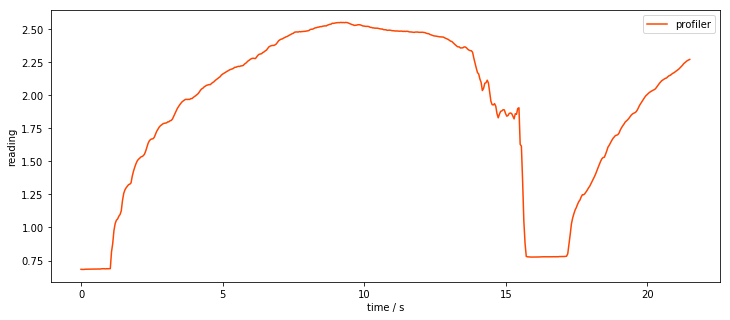

In [17]:
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))

filepath = '../../exp_26feb19/right_after_filling_26feb19.mat'

mat = sio.loadmat(filepath, squeeze_me=True)
PP = mat['ch4']#dens_C(mat['ch2'])
time = mat['time']
ax1.plot(time,PP, label='profiler', color=colors[2])

ax1.legend(bbox_to_anchor=(1,1))
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax1.set_xlabel('time / s')

print(np.argmax(PP))

213


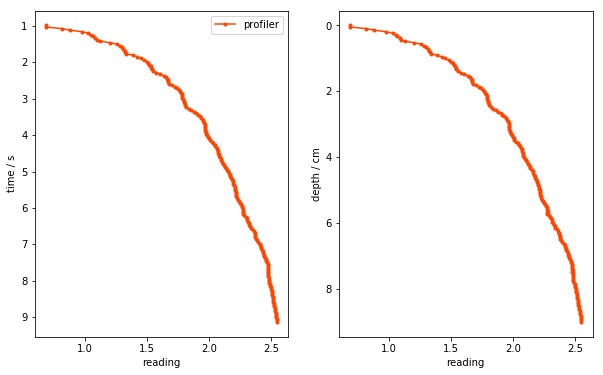

In [36]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10, 6))

depths = time2dist(9.0,time[23:213])
ax0.plot(PP[23:213],time[23:213],'.-',label='profiler', color=colors[2])
ax1.plot(PP[23:213],depths,'.-',label='profiler', color=colors[2])

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_xlabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('time / s')
ax1.set_xlabel('reading')#'density / g cm$^{-3}$')
ax1.set_ylabel('depth / cm')
ax0.invert_yaxis()
ax1.invert_yaxis()
print(np.argmax(PP))

213


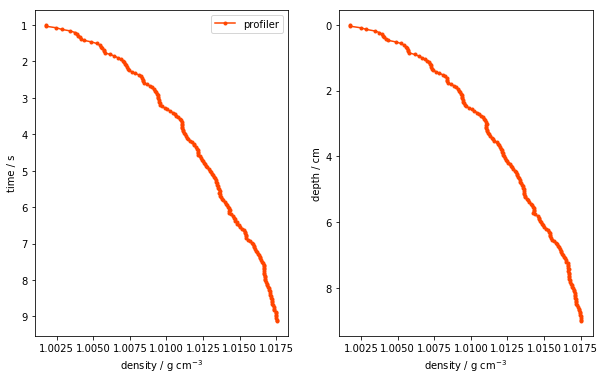

In [35]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10, 6))

depths = time2dist(9.0,time[23:213])
Pdens = densP(PP[23:213])

ax0.plot(Pdens,time[23:213],'.-',label='profiler', color=colors[2])
ax1.plot(Pdens,depths,'.-',label='profiler', color=colors[2])

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_xlabel('density / g cm$^{-3}$')
ax0.set_ylabel('time / s')
ax1.set_xlabel('density / g cm$^{-3}$')
ax1.set_ylabel('depth / cm')
ax0.invert_yaxis()
ax1.invert_yaxis()
print(np.argmax(PP))

### Experiment

../../exp_26feb19/exp_26feb19.mat


Text(0.5,0,'sample')

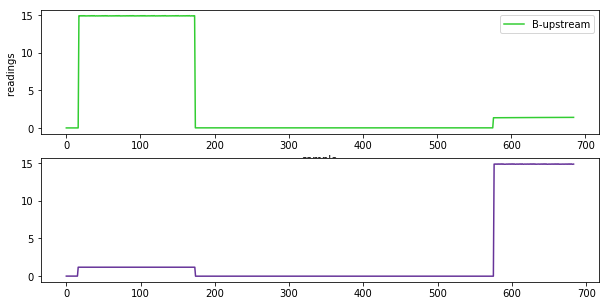

In [57]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = ['B-upstream','C-downstream']

filepath = '../../exp_26feb19/exp_26feb19.mat'
print(filepath)
    
mat = sio.loadmat(filepath, squeeze_me=True)
PB = mat['ch2']
PC = mat['ch4']

ax0.plot(PB,'-', label=labels[0], color=colors[0])
ax1.plot(PC,'-', label=labels[1], color=colors[1])


ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('readings ')
ax0.set_xlabel('sample')

Text(0.5,1,'Probe density minus initial density')

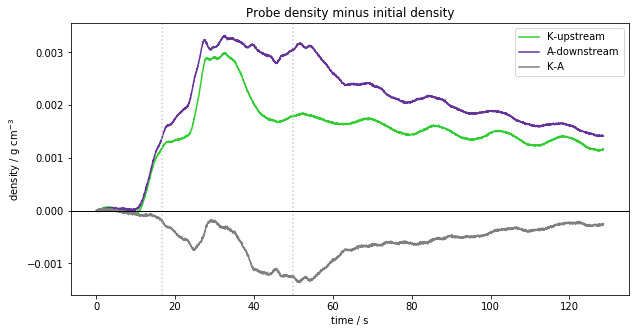

In [13]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_K(PK)-dens_K(PK)[0],'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_A(PA)-dens_A(PA)[0],'-', label=labels[1], color=colors[1])
ax0.plot(time,dens_K(PK)-dens_K(PK)[0]-(dens_A(PA)-dens_A(PA)[0]),'-', label='K-A', color='0.5')
plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


In [58]:
mat

{'None': MatlabOpaque([(b's1', b'MCOS', b'serial', array([3707764736,          2,          1,          1,          1,
                 2], dtype=uint32))],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]),
 '__function_workspace__': array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Feb 26 13:52:08 2019',
 '__version__': '1.0',
 'ch1': array([1.18940e+00, 1.18860e+00, 1.19050e+00, 1.18860e+00, 1.18890e+00,
        1.18970e+00, 1.18910e+00, 1.18940e+00, 1.18890e+00, 1.19020e+00,
        1.18790e+00, 1.18840e+00, 1.19040e+00, 1.19070e+00, 1.18940e+00,
        1.18810e+00, 1.18940e+00, 0.00000e+00, 0.00000e+00, 8.00000e-04,
        8.00000e-04, 8.00000e-04, 0.00000e+00, 8.00000e-04, 1.20000e-03,
        0.00000e+00, 0.00000e+00, 8.00000e-04, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 8.00000e-04, 8.00000e-04, 8.00000e-04,
        8.00000e-04, 0.00000e+0